In [ ]:
from fastai2.basics import *
from fastai2.tabular.all import *
from fast_tabnet.core import *
import wget, gzip, shutil
np.random.seed(0)

# Forest Cover Type dataset

In [ ]:
BASE_DIR = Path.home().joinpath('data/tabnet')

In [ ]:
datafile = BASE_DIR.joinpath('covtype.data.gz')
datafile.parent.mkdir(parents=True, exist_ok=True)

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz"
if not datafile.exists():
    wget.download(url, datafile.as_posix())

In [ ]:
target = "Covertype"

cat_names = [
    "Wilderness_Area1", "Wilderness_Area2", "Wilderness_Area3",
    "Wilderness_Area4", "Soil_Type1", "Soil_Type2", "Soil_Type3", "Soil_Type4",
    "Soil_Type5", "Soil_Type6", "Soil_Type7", "Soil_Type8", "Soil_Type9",
    "Soil_Type10", "Soil_Type11", "Soil_Type12", "Soil_Type13", "Soil_Type14",
    "Soil_Type15", "Soil_Type16", "Soil_Type17", "Soil_Type18", "Soil_Type19",
    "Soil_Type20", "Soil_Type21", "Soil_Type22", "Soil_Type23", "Soil_Type24",
    "Soil_Type25", "Soil_Type26", "Soil_Type27", "Soil_Type28", "Soil_Type29",
    "Soil_Type30", "Soil_Type31", "Soil_Type32", "Soil_Type33", "Soil_Type34",
    "Soil_Type35", "Soil_Type36", "Soil_Type37", "Soil_Type38", "Soil_Type39",
    "Soil_Type40"
]

cont_names = [
    "Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
    "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points"
]

feature_columns = (
    cont_names + cat_names + [target])

In [ ]:
df = pd.read_csv(datafile, header=None, names=feature_columns)
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Covertype
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
procs = [Categorify, FillMissing, Normalize]
splits = RandomSplitter(0.05)(range_of(df))

In [ ]:
to = TabularPandas(df, procs, cat_names, cont_names, y_names=target, y_block = CategoryBlock(), splits=splits)
dls = to.dataloaders(bs=64*64*4)

In [ ]:
model = TabNetModel(get_emb_sz(to), len(to.cont_names), dls.c, n_d=64, n_a=64, n_steps=5, virtual_batch_size=256)
opt_func = partial(Adam, wd=0.01, eps=1e-5)
learn = Learner(dls, model, CrossEntropyLossFlat(), opt_func=opt_func, lr=3e-2, metrics=[accuracy])
model.size()

522632

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(100)

epoch,train_loss,valid_loss,accuracy,time
0,2.256847,1.502823,0.495146,00:16
1,1.714538,1.232591,0.499484,00:16
2,1.437834,1.109687,0.531635,00:16
3,1.238540,0.940593,0.615215,00:19
4,1.050501,0.801974,0.652427,00:19
5,0.924480,0.768550,0.663855,00:19
6,0.851805,0.751569,0.673976,00:19
7,0.806640,0.730970,0.683374,00:19
8,0.773319,0.716243,0.686196,00:19
9,0.750163,0.709107,0.690740,00:19


# Poker hand

https://www.kaggle.com/c/poker-rule-induction

In [ ]:
BASE_DIR = Path.home().joinpath('data/tabnet/poker')

In [ ]:
df = pd.read_csv(BASE_DIR.joinpath('train.csv'))
df.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
0,4,9,2,1,2,2,4,7,2,8,0
1,1,4,3,6,1,12,3,11,2,7,0
2,1,11,4,1,3,7,4,11,2,1,2
3,2,9,2,4,3,6,1,9,4,9,3
4,1,8,2,4,2,11,2,2,2,1,0


In [ ]:
cat_names = ['S1', 'S2', 'S3', 'S4', 'S5', 'C1', 'C2', 'C3', 'C4', 'C5']
cont_names = []
target = ['hand']

In [ ]:
procs = [Categorify, Normalize]
splits = RandomSplitter(0.05)(range_of(df))

In [ ]:
to = TabularPandas(df, procs, cat_names, cont_names, y_names=target, y_block = CategoryBlock(), splits=splits)
dls = to.dataloaders(bs=64*4)

In [ ]:
model = TabNetModel(get_emb_sz(to), len(to.cont_names), dls.c, n_d=16, n_a=16, 
                    n_steps=5, virtual_batch_size=256, gamma=1.5)

In [ ]:
opt_func = partial(Adam, eps=1e-5)
learn = Learner(dls, model, CrossEntropyLossFlat(), opt_func=opt_func, lr=3e-2, metrics=[accuracy])

SuggestedLRs(lr_min=0.33113112449646, lr_steep=0.019054606556892395)

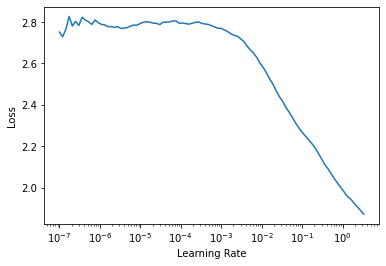

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(1000)

epoch,train_loss,valid_loss,accuracy,time
0,2.218939,1.822282,0.498400,00:03
1,1.455403,1.430152,0.498400,00:03
2,1.228657,1.228909,0.498400,00:03
3,1.135545,1.107178,0.481600,00:03
4,1.086681,1.038277,0.487200,00:03
5,1.059229,1.029335,0.478400,00:03
6,1.043186,1.032832,0.476000,00:03
7,1.023151,1.038147,0.467200,00:03
8,1.024411,1.021341,0.485600,00:03
9,1.021603,1.024640,0.488000,00:03


# Sarcos Robotics Arm Inverse Dynamics

http://www.gaussianprocess.org/gpml/data/

In [ ]:
BASE_DIR = Path.home().joinpath('data/tabnet/sarcos')

In [ ]:
from mat4py import *

In [ ]:
wget.download('http://www.gaussianprocess.org/gpml/data/sarcos_inv.mat', BASE_DIR.as_posix())
wget.download('http://www.gaussianprocess.org/gpml/data/sarcos_inv_test.mat', BASE_DIR.as_posix())

'/home/u/data/tabnet/sarcos/sarcos_inv_test (1).mat'

In [ ]:
data = loadmat(BASE_DIR.joinpath('sarcos_inv.mat').as_posix())

In [ ]:
df = pd.DataFrame(data['sarcos_inv'])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.019478,-0.134218,0.027439,1.516401,0.300936,0.058259,0.150134,-0.266791,-0.237134,-0.091272,...,11.695956,1.210212,-22.119289,50.292652,-36.971897,20.937170,47.821712,-0.424812,-0.907553,8.090739
1,0.017279,-0.137077,0.026999,1.532517,0.301344,0.058259,0.128653,-0.153640,-0.335279,0.006449,...,14.643369,1.015070,-17.048688,44.104164,-28.851845,16.230194,43.194073,-0.228739,-1.235817,7.762475
2,0.016336,-0.140878,0.027250,1.549670,0.302318,0.059027,0.104104,-0.047313,-0.418732,0.106274,...,15.467628,0.910548,-11.415526,37.354858,-20.809343,12.379975,39.386017,0.244491,-1.700880,7.289678
3,0.016273,-0.145307,0.029072,1.566855,0.307628,0.059027,0.080321,0.053238,-0.460963,0.188013,...,10.309203,0.921360,-5.772058,30.676065,-13.963816,7.702940,36.478813,-0.182062,-2.143370,6.410800
4,0.017279,-0.150051,0.031083,1.584416,0.314162,0.059027,0.058840,0.133810,-0.462264,0.263975,...,2.868096,1.059957,-0.491542,25.920128,-11.178479,5.643934,34.773911,-1.031687,-2.355776,5.792892


In [ ]:
data = loadmat(BASE_DIR.joinpath('sarcos_inv_test.mat').as_posix())
test_df = pd.DataFrame(data['sarcos_inv_test'])

In [ ]:
splits = RandomSplitter()(df)
procs = [Normalize]
to = TabularPandas(df, procs, cat_names=[], cont_names=list(range(0,27)), 
                   y_names=27, splits=splits, y_block=TransformBlock())

In [ ]:
dls = to.dataloaders(bs=512)

In [ ]:
model = TabNetModel([], len(to.cont_names), 1, n_d=64, n_a=64, n_steps=5, virtual_batch_size=256)
opt_func = partial(Adam, wd=0.01, eps=1e-5)
learn = Learner(dls, model, MSELossFlat(), opt_func=opt_func, lr=1e-2)
model.size()

454212

SuggestedLRs(lr_min=0.15848932266235352, lr_steep=0.00363078061491251)

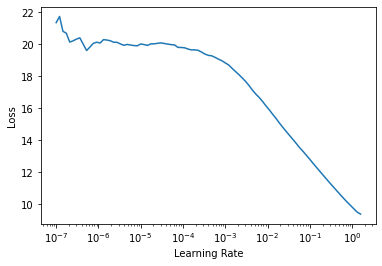

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(1000)

epoch,train_loss,valid_loss,time
0,0.224359,0.196448,00:02
1,0.225891,0.191549,00:02
2,0.221657,0.183844,00:02
3,0.217434,0.191718,00:02
4,0.209673,0.172323,00:02
5,0.212009,0.187649,00:02
6,0.209413,0.172449,00:02
7,0.212617,0.191293,00:02
8,0.221031,0.190216,00:02
9,0.226265,0.186464,00:02


In [ ]:
dl = learn.dls.test_dl(test_df)

In [ ]:
learn.validate(dl=dl)

(#1) [0.017111774533987045]

# Higgs Boson

In [ ]:
BASE_DIR = Path.home().joinpath('data/tabnet/higgs')

In [ ]:
datafile = BASE_DIR.joinpath('HIGGS.csv.gz')
datafile.parent.mkdir(parents=True, exist_ok=True)

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz'
if not datafile.exists():
    wget.download(url, datafile.as_posix())

In [ ]:
feature_columns = ['label', 'lepton pT', 'lepton eta', 'lepton phi', 'missing energy magnitude', 
           'missing energy phi', 'jet 1 pt', 'jet 1 eta', 'jet 1 phi', 'jet 1 b-tag',
           'jet 2 pt', 'jet 2 eta', 'jet 2 phi', 'jet 2 b-tag', 'jet 3 pt', 
           'jet 3 eta', 'jet 3 phi', 'jet 3 b-tag', 'jet 4 pt', 'jet 4 eta',
           'jet 4 phi', 'jet 4 b-tag', 'm_jj', 'm_jjj', 'm_lv', 'm_jlv',
           'm_bb', 'm_wbb', 'm_wwbb']

In [ ]:
df = pd.read_csv(datafile, header=None, names=feature_columns)
df.head()

,label,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,...,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


In [ ]:
df['label'] = df['label'].astype(int)

In [ ]:
df.replace({'label': {1.0:'yes',0.0:'no'}}, inplace=True)

In [ ]:
splits = IndexSplitter(range(len(df)-500000, len(df)))(df)

In [ ]:
procs = [Normalize]

In [ ]:
to = TabularPandas(df, procs, cat_names=[], cont_names=feature_columns[1:], 
                   y_names='label', splits=splits)

In [ ]:
dls = to.dataloaders(bs=64*64*4)

In [ ]:
model = TabNetModel([], len(to.cont_names), dls.c, n_d=64, n_a=64, n_steps=5, virtual_batch_size=256)
opt_func = partial(Adam, wd=0.01, eps=1e-5)
learn = Learner(dls, model, CrossEntropyLossFlat(), opt_func=opt_func, lr=3e-2, metrics=[accuracy])
model.size()

454864

SuggestedLRs(lr_min=0.2290867567062378, lr_steep=0.0020892962347716093)

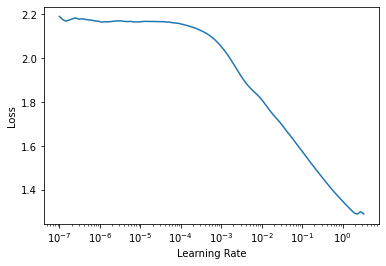

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.624057,0.612793,0.659400,03:23
1,0.567584,0.560952,0.707080,03:22
2,0.549331,0.544535,0.719792,03:21
3,0.519018,0.511642,0.742338,03:19
4,0.502182,0.496061,0.751224,03:20
5,0.498897,0.494571,0.752740,03:18
6,0.495255,0.490600,0.755614,03:19
7,0.490927,0.486565,0.757862,03:19
8,0.488767,0.484705,0.759152,03:19
9,0.488263,0.483995,0.759488,03:22
